##### 과제에서 해야할 거
- 전처리
- 모델 구현
- 성능평가

##### 컬럼 정보
1. ID number
2. Diagnosis (M = malignant, B = benign)
3. ~ 32. Ten real-valued features are computed for each cell nucleus:
    a) radius (mean of distances from center to points on the perimeter)
    b) texture (standard deviation of gray-scale values)
    c) perimeter
    d) area
    e) smoothness (local variation in radius lengths)
    f) compactness (perimeter^2 / area - 1.0)
    g) concavity (severity of concave portions of the contour) : 오목함
    h) concave points (number of concave portions of the contour)
    i) symmetry : 대칭
    j) fractal dimension ("coastline approximation" - 1)
                  
                
Several of the papers listed above contain detailed descriptions of how these features are computed. 

The mean, standard error, and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features.  
For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.

### 모듈 준비 및 데이터 불러오기

In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder    #데이테 라벨을 바꾸는거
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.multiclass import OneVsOneClassifier, OneVsRestClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, classification_report

In [80]:
file = '../data/breast_wdbc_data.csv'
data = pd.read_csv(file, header = None)
data

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [81]:
data.shape

(569, 32)

In [82]:
data.columns = ['ID', 'Diagnosis', 'radius1', 'texture1', 'perimeter1', 'area1','smoothness1', 'compactness1', 'concavity1', 'concave_points1', 'symmetry1','fractal_dimension1',
           'radius2', 'texture2', 'perimeter2', 'area2','smoothness2', 'compactness2', 'concavity2', 'concave_points2', 'symmetry2','fractal_dimension2', 'radius3', 'texture3', 'perimeter3', 'area3','smoothness3', 'compactness3', 'concavity3', 'concave_points3', 'symmetry3','fractal_dimension3']

In [83]:
data

,ID,Diagnosis,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [84]:
col_list = data.columns.to_list()
col_list

['ID',
 'Diagnosis',
 'radius1',
 'texture1',
 'perimeter1',
 'area1',
 'smoothness1',
 'compactness1',
 'concavity1',
 'concave_points1',
 'symmetry1',
 'fractal_dimension1',
 'radius2',
 'texture2',
 'perimeter2',
 'area2',
 'smoothness2',
 'compactness2',
 'concavity2',
 'concave_points2',
 'symmetry2',
 'fractal_dimension2',
 'radius3',
 'texture3',
 'perimeter3',
 'area3',
 'smoothness3',
 'compactness3',
 'concavity3',
 'concave_points3',
 'symmetry3',
 'fractal_dimension3']

In [85]:
len(col_list)

32

In [86]:
col_list_ten = col_list[2:12]
for i in range(len(col_list_ten)):
    col_list_ten[i] = col_list_ten[i].replace('1','')
col_list_ten

['radius',
 'texture',
 'perimeter',
 'area',
 'smoothness',
 'compactness',
 'concavity',
 'concave_points',
 'symmetry',
 'fractal_dimension']

In [87]:
dataframe_list = []

for c in col_list_ten:
    sample_list = []
    for col in col_list:
        if c in col:
            sample_list.append(col)
    dataframe_list.append(sample_list)

dataframe_list

[['radius1', 'radius2', 'radius3'],
 ['texture1', 'texture2', 'texture3'],
 ['perimeter1', 'perimeter2', 'perimeter3'],
 ['area1', 'area2', 'area3'],
 ['smoothness1', 'smoothness2', 'smoothness3'],
 ['compactness1', 'compactness2', 'compactness3'],
 ['concavity1', 'concavity2', 'concavity3'],
 ['concave_points1', 'concave_points2', 'concave_points3'],
 ['symmetry1', 'symmetry2', 'symmetry3'],
 ['fractal_dimension1', 'fractal_dimension2', 'fractal_dimension3']]

In [88]:
def clean_df(i):
    num = i+1
    data_num = data[dataframe_list[i]]
    data_num['sum'] = data_num.sum(axis = 'columns')
    data[f"sum{num}"] = data_num['sum']
    
# 평균을 구할까하다가 2번쨰 속성들만 다들 너무 값이 차이 나느 것을 확인해서 총합으로 해보기로 결정함


In [89]:
for i in range(len(col_list_ten)):
    clean_df(i)

data

C:\Users\kdp\AppData\Local\Temp\ipykernel_18848\3138535073.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_num['sum'] = data_num.sum(axis = 'columns')
C:\Users\kdp\AppData\Local\Temp\ipykernel_18848\3138535073.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_num['sum'] = data_num.sum(axis = 'columns')
C:\Users\kdp\AppData\Local\Temp\ipykernel_18848\3138535073.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

,ID,Diagnosis,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,...,sum1,sum2,sum3,sum4,sum5,sum6,sum7,sum8,sum9,sum10
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,44.4650,28.6153,315.989,3173.40,0.286999,0.99224,1.06573,0.42837,0.73203,0.203803
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,46.1035,41.9139,295.098,3356.08,0.213765,0.27832,0.34710,0.26957,0.47009,0.149222
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,44.0056,47.5669,287.085,3006.03,0.260150,0.62446,0.68612,0.39148,0.59070,0.152141
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.8256,48.0360,179.895,981.03,0.361410,1.22478,0.98491,0.38137,0.98313,0.279648
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,43.5872,31.7913,292.738,2966.44,0.249190,0.36241,0.65488,0.28565,0.43486,0.140725
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,48.1860,50.0460,315.773,3664.70,0.262300,0.35611,0.70658,0.38504,0.38974,0.131619
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,44.5855,68.9630,291.403,3091.04,0.220169,0.31983,0.50500,0.27749,0.45138,0.124198
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,36.0364,63.2750,238.425,2030.65,0.204353,0.44901,0.48011,0.21039,0.39398,0.138572
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,47.0660,70.3450,330.472,3172.22,0.289322,1.20668,1.36127,0.43364,0.67164,0.200345


In [90]:
list = data.columns.tolist()[-10:]
usedata = data[list]
usedata   #최종적으로 사용할 데이터

,sum1,sum2,sum3,sum4,sum5,sum6,sum7,sum8,sum9,sum10
0,44.4650,28.6153,315.989,3173.40,0.286999,0.99224,1.06573,0.42837,0.73203,0.203803
1,46.1035,41.9139,295.098,3356.08,0.213765,0.27832,0.34710,0.26957,0.47009,0.149222
2,44.0056,47.5669,287.085,3006.03,0.260150,0.62446,0.68612,0.39148,0.59070,0.152141
3,26.8256,48.0360,179.895,981.03,0.361410,1.22478,0.98491,0.38137,0.98313,0.279648
4,43.5872,31.7913,292.738,2966.44,0.249190,0.36241,0.65488,0.28565,0.43486,0.140725
...,...,...,...,...,...,...,...,...,...,...
564,48.1860,50.0460,315.773,3664.70,0.262300,0.35611,0.70658,0.38504,0.38974,0.131619
565,44.5855,68.9630,291.403,3091.04,0.220169,0.31983,0.50500,0.27749,0.45138,0.124198
566,36.0364,63.2750,238.425,2030.65,0.204353,0.44901,0.48011,0.21039,0.39398,0.138572
567,47.0660,70.3450,330.472,3172.22,0.289322,1.20668,1.36127,0.43364,0.67164,0.200345


### 전처리

In [91]:
usedata.columns = [col_list_ten]
usedata
# 여기서 diagnosis 컬럼은 빠져있음

,radius,texture,perimeter,area,smoothness,compactness,concavity,concave_points,symmetry,fractal_dimension
0,44.4650,28.6153,315.989,3173.40,0.286999,0.99224,1.06573,0.42837,0.73203,0.203803
1,46.1035,41.9139,295.098,3356.08,0.213765,0.27832,0.34710,0.26957,0.47009,0.149222
2,44.0056,47.5669,287.085,3006.03,0.260150,0.62446,0.68612,0.39148,0.59070,0.152141
3,26.8256,48.0360,179.895,981.03,0.361410,1.22478,0.98491,0.38137,0.98313,0.279648
4,43.5872,31.7913,292.738,2966.44,0.249190,0.36241,0.65488,0.28565,0.43486,0.140725
...,...,...,...,...,...,...,...,...,...,...
564,48.1860,50.0460,315.773,3664.70,0.262300,0.35611,0.70658,0.38504,0.38974,0.131619
565,44.5855,68.9630,291.403,3091.04,0.220169,0.31983,0.50500,0.27749,0.45138,0.124198
566,36.0364,63.2750,238.425,2030.65,0.204353,0.44901,0.48011,0.21039,0.39398,0.138572
567,47.0660,70.3450,330.472,3172.22,0.289322,1.20668,1.36127,0.43364,0.67164,0.200345


In [92]:
usedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   (radius,)             569 non-null    float64
 1   (texture,)            569 non-null    float64
 2   (perimeter,)          569 non-null    float64
 3   (area,)               569 non-null    float64
 4   (smoothness,)         569 non-null    float64
 5   (compactness,)        569 non-null    float64
 6   (concavity,)          569 non-null    float64
 7   (concave_points,)     569 non-null    float64
 8   (symmetry,)           569 non-null    float64
 9   (fractal_dimension,)  569 non-null    float64
dtypes: float64(10)
memory usage: 44.6 KB


In [93]:
# 결측치 확인
usedata.isna().sum()
# 결측치 없음

radius               0
texture              0
perimeter            0
area                 0
smoothness           0
compactness          0
concavity            0
concave_points       0
symmetry             0
fractal_dimension    0
dtype: int64

In [94]:
# 중복값 확인
usedata.duplicated().sum()
# 중복값 없음

0

In [95]:
# 이상치 시각화로 확인
flier_list_boxplot = []

def draw_box(col_name):
    #plt.figure(figsize = (20,20))
    obj = plt.boxplot(usedata[col_name])
    plt.show
    print(len(obj['fliers'][0].get_ydata().tolist()))
    flier_list_boxplot.append(len(obj['fliers'][0].get_ydata().tolist()))

17
7
17
33
8
15
12
1
20
20


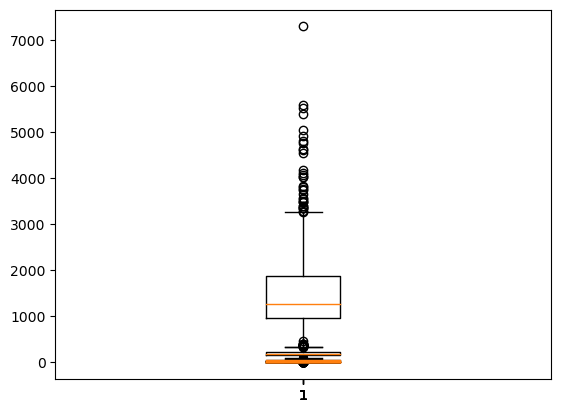

In [96]:
for i in range(len(col_list_ten)):
    draw_box(col_list_ten[i])

In [97]:
# 이상치를 찾아보자 => 방법 : 평균과 편차를 이용한 탐지 Z - Score
# Z - Score = (데이터 - 평균) / 표준편차
flier_list = []
def flier(col_name):
    series_data = usedata[col_name]
    mean = series_data.mean()
    std = series_data.std()
    result = series_data - mean
    z_score = result/std
    
    base = 2.2
    mask = z_score.abs() <= base
    print(f"[ z-score 기준으로 이상치를 계산했을 때의 총 개수 ]")
    print(z_score[mask].isna().sum())
    print()
    flier_list.append(z_score[mask].isna().sum())

In [98]:
for col in col_list_ten:
    flier(col)

[ z-score 기준으로 이상치를 계산했을 때의 총 개수 ]
radius    17
dtype: int64

[ z-score 기준으로 이상치를 계산했을 때의 총 개수 ]
texture    13
dtype: int64

[ z-score 기준으로 이상치를 계산했을 때의 총 개수 ]
perimeter    17
dtype: int64

[ z-score 기준으로 이상치를 계산했을 때의 총 개수 ]
area    20
dtype: int64

[ z-score 기준으로 이상치를 계산했을 때의 총 개수 ]
smoothness    15
dtype: int64

[ z-score 기준으로 이상치를 계산했을 때의 총 개수 ]
compactness    21
dtype: int64

[ z-score 기준으로 이상치를 계산했을 때의 총 개수 ]
concavity    18
dtype: int64

[ z-score 기준으로 이상치를 계산했을 때의 총 개수 ]
concave_points    17
dtype: int64

[ z-score 기준으로 이상치를 계산했을 때의 총 개수 ]
symmetry    20
dtype: int64

[ z-score 기준으로 이상치를 계산했을 때의 총 개수 ]
fractal_dimension    20
dtype: int64


In [99]:
flier_list_boxplot

[17, 7, 17, 33, 8, 15, 12, 1, 20, 20]

In [100]:
flier_list

[radius    17
 dtype: int64,
 texture    13
 dtype: int64,
 perimeter    17
 dtype: int64,
 area    20
 dtype: int64,
 smoothness    15
 dtype: int64,
 compactness    21
 dtype: int64,
 concavity    18
 dtype: int64,
 concave_points    17
 dtype: int64,
 symmetry    20
 dtype: int64,
 fractal_dimension    20
 dtype: int64]

In [101]:
# boxplot과 z_score을 비교했을 때 z_score에서 base = 2.2일때 이상치 개수가 비슷하다
# 이 상태에서 이상치를 drop 시키기로 했다.

In [102]:
def drop_flier(col_name):
    series_data = usedata[col_name]
    mean = series_data.mean()
    std = series_data.std()
    result = series_data - mean
    z_score = result/std
    base = 2.2
    mask = z_score.abs() <= base
    
    # 결측값 제거
    z_score[mask] = z_score[mask].dropna()
    print(f"[ 이상치 제거 한 후의 이상치 개수 ]")
    print(z_score[mask].isna().sum())
for col in col_list_ten:
    drop_flier(col)

[ 이상치 제거 한 후의 이상치 개수 ]
radius    17
dtype: int64
[ 이상치 제거 한 후의 이상치 개수 ]
texture    13
dtype: int64
[ 이상치 제거 한 후의 이상치 개수 ]
perimeter    17
dtype: int64
[ 이상치 제거 한 후의 이상치 개수 ]
area    20
dtype: int64
[ 이상치 제거 한 후의 이상치 개수 ]
smoothness    15
dtype: int64
[ 이상치 제거 한 후의 이상치 개수 ]
compactness    21
dtype: int64
[ 이상치 제거 한 후의 이상치 개수 ]
concavity    18
dtype: int64
[ 이상치 제거 한 후의 이상치 개수 ]
concave_points    17
dtype: int64
[ 이상치 제거 한 후의 이상치 개수 ]
symmetry    20
dtype: int64
[ 이상치 제거 한 후의 이상치 개수 ]
fractal_dimension    20
dtype: int64


왜 결측값이 제거가 안되는지???????????????????????????????????????????????????

### 타겟과 피처 분리하기

In [103]:
target = data['Diagnosis']
target = target.replace('B', 1)
target = target.replace('M', 2)
# Benign => 1            Malignant => 2 로 대체
target.head()
target.value_counts()

Diagnosis
1    357
2    212
Name: count, dtype: int64

In [104]:
feature = usedata
feature.head()

,radius,texture,perimeter,area,smoothness,compactness,concavity,concave_points,symmetry,fractal_dimension
0,44.4650,28.6153,315.989,3173.40,0.286999,0.99224,1.06573,0.42837,0.73203,0.203803
1,46.1035,41.9139,295.098,3356.08,0.213765,0.27832,0.34710,0.26957,0.47009,0.149222
2,44.0056,47.5669,287.085,3006.03,0.260150,0.62446,0.68612,0.39148,0.59070,0.152141
3,26.8256,48.0360,179.895,981.03,0.361410,1.22478,0.98491,0.38137,0.98313,0.279648
4,43.5872,31.7913,292.738,2966.44,0.249190,0.36241,0.65488,0.28565,0.43486,0.140725


### 훈련용과 테스트용 분리하기

In [105]:
from sklearn.model_selection import train_test_split

In [106]:
X_train, X_test, y_train, y_test = train_test_split(feature, target, test_size=0.2, stratify=target, random_state=42)

In [107]:
print('[ 훈련용 ]')
print(f"X_train: {X_train.shape}     y_train: {y_train.shape}")
print('[ 테스트용 ]')
print(f"X_test: {X_test.shape}      y_test: {y_test.shape}")

[ 훈련용 ]
X_train: (455, 10)     y_train: (455,)
[ 테스트용 ]
X_test: (114, 10)      y_test: (114,)


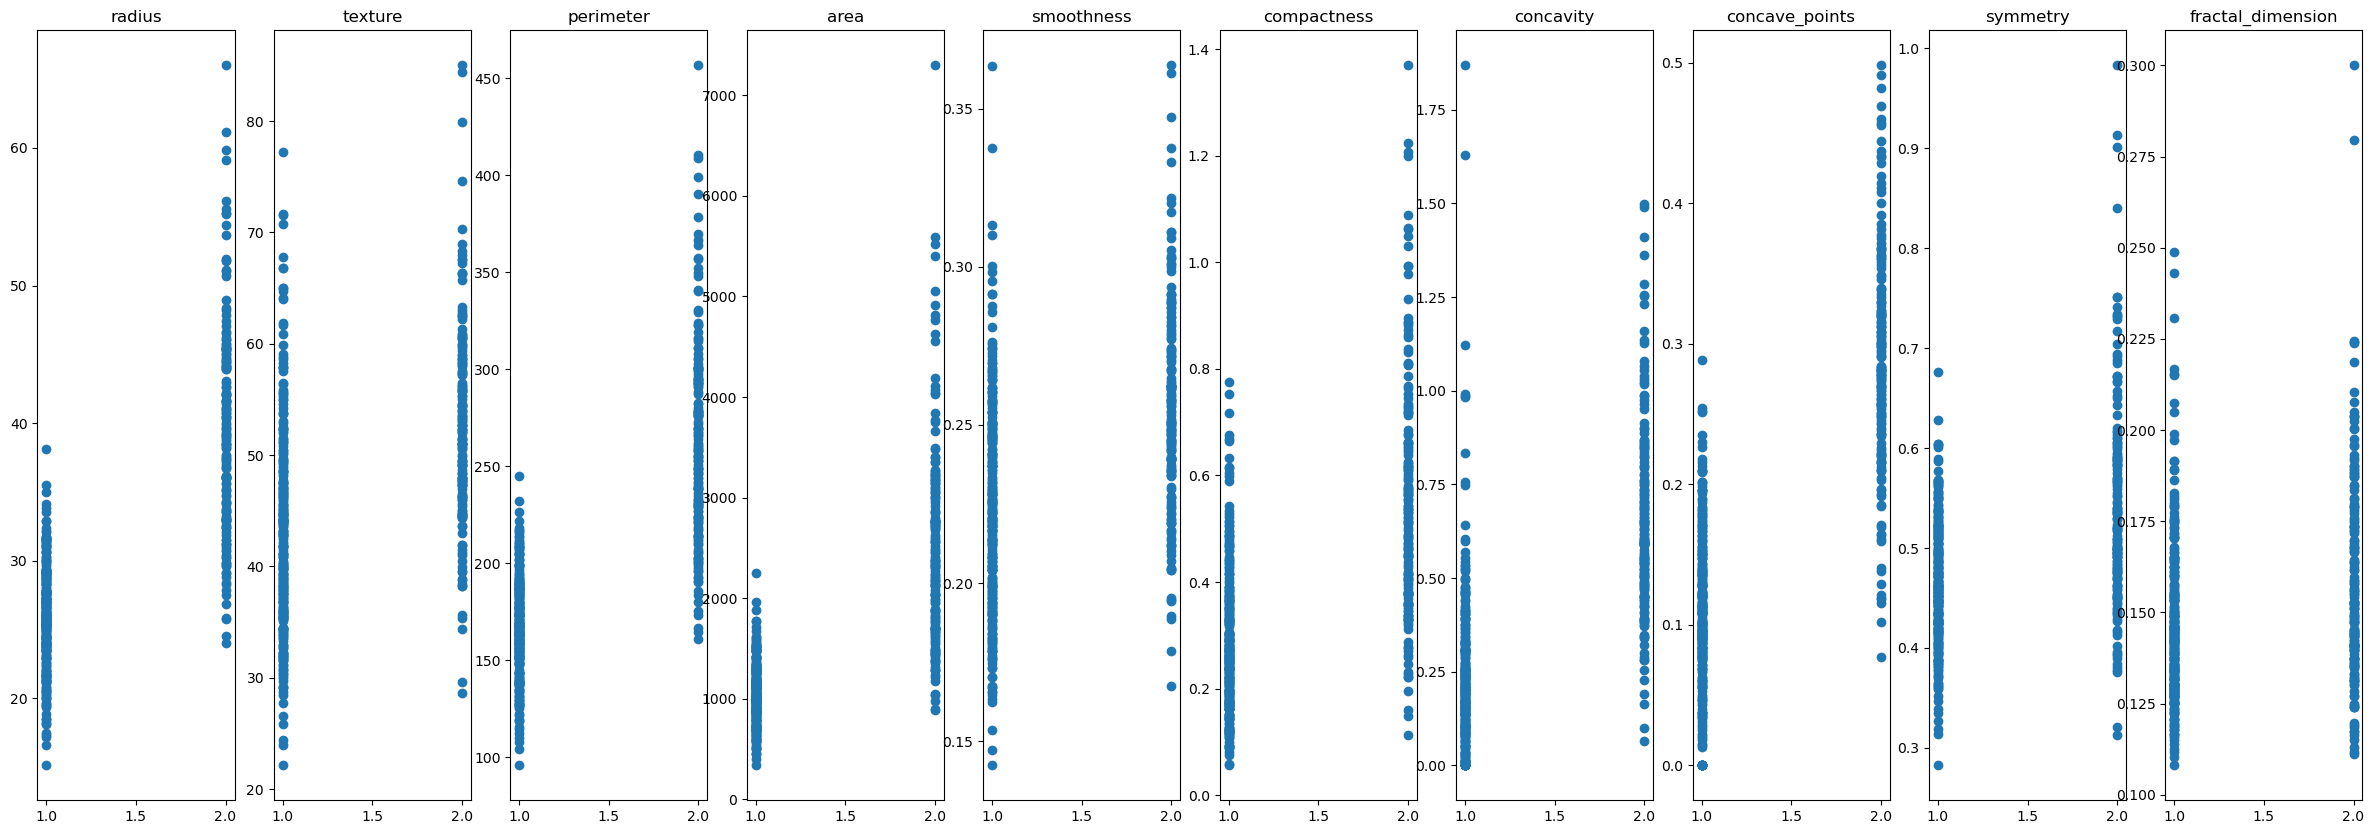

In [108]:
plt.figure(figsize = (30,10))
for i in range(len(col_list_ten)):    
    plt.subplot(1,10, i+1)
    plt.scatter(y_train, X_train[col_list_ten[i]])
    plt.title(col_list_ten[i])
plt.show()

현재 y축들이 범위가 천차만별이다 그럼 스케일링을 진행시키자 

### 스케일링 > 학습 > 테스트

##### 스케일링 3가지 모듈과 학습 알고리즘 2개를 조합했을때,, 무엇이 가장 score가 높게 나올까?

학습 알고리즘 : KNeighborsClassifier()

In [109]:
scaler = StandardScaler()
scaler.fit(X_train)
scaled_X_train = scaler.transform(X_train)
scaled_X_test = scaler.transform(X_test)

model = KNeighborsClassifier()
model.fit(scaled_X_train, y_train)
print(scaler, model)
print('[train score]', model.score(scaled_X_train, y_train))
print('[test score] ', model.score(scaled_X_test, y_test))

StandardScaler() KNeighborsClassifier()
[train score] 0.9758241758241758
[test score]  0.9736842105263158


In [110]:
scaler = MinMaxScaler()
scaler.fit(X_train)
scaled_X_train = scaler.transform(X_train)
scaled_X_test = scaler.transform(X_test)

model = KNeighborsClassifier()
model.fit(scaled_X_train, y_train)
print(scaler, model)
print('[train score]', model.score(scaled_X_train, y_train))
print('[test score] ', model.score(scaled_X_test, y_test))

MinMaxScaler() KNeighborsClassifier()
[train score] 0.9714285714285714
[test score]  0.9736842105263158


In [111]:
scaler = RobustScaler()
scaler.fit(X_train)
scaled_X_train = scaler.transform(X_train)
scaled_X_test = scaler.transform(X_test)

model = KNeighborsClassifier()
model.fit(scaled_X_train, y_train)
print(scaler, model)
print('[train score]', model.score(scaled_X_train, y_train))
print('[test score] ', model.score(scaled_X_test, y_test))

RobustScaler() KNeighborsClassifier()
[train score] 0.9758241758241758
[test score]  0.9736842105263158


학습 알고리즘 : LineRegression()

In [112]:
scaler = StandardScaler()
scaler.fit(X_train)
scaled_X_train = scaler.transform(X_train)
scaled_X_test = scaler.transform(X_test)

model = LogisticRegression()
model.fit(scaled_X_train, y_train)
print(scaler, model)
print('[train score]', model.score(scaled_X_train, y_train))
print('[test score] ', model.score(scaled_X_test, y_test))

StandardScaler() LogisticRegression()
[train score] 0.978021978021978
[test score]  0.9824561403508771


In [113]:
scaler = MinMaxScaler()
scaler.fit(X_train)
scaled_X_train = scaler.transform(X_train)
scaled_X_test = scaler.transform(X_test)

model = LogisticRegression()
model.fit(scaled_X_train, y_train)
print(scaler, model)
print('[train score]', model.score(scaled_X_train, y_train))
print('[test score] ', model.score(scaled_X_test, y_test))

MinMaxScaler() LogisticRegression()
[train score] 0.9582417582417583
[test score]  0.956140350877193


In [114]:
scaler = RobustScaler()
scaler.fit(X_train)
scaled_X_train = scaler.transform(X_train)
scaled_X_test = scaler.transform(X_test)

model = LogisticRegression()
model.fit(scaled_X_train, y_train)
print(scaler, model)
print('[train score]', model.score(scaled_X_train, y_train))
print('[test score] ', model.score(scaled_X_test, y_test))

RobustScaler() LogisticRegression()
[train score] 0.978021978021978
[test score]  0.9824561403508771


### 예측

In [115]:
y_pred = model.predict(scaled_X_test)
y_pred

array([1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1,
       1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1,
       2, 2, 1, 2, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 2, 2, 1, 1, 1, 1, 2, 2,
       2, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1,
       1, 1, 1, 2], dtype=int64)

In [116]:
model.predict_proba(scaled_X_test)
# 타겟의 종류 중에서 가장 높은 확률이 나오는게 답이 된다.

array([[9.98719629e-01, 1.28037134e-03],
       [4.75196988e-06, 9.99995248e-01],
       [7.65592581e-01, 2.34407419e-01],
       [3.29423736e-01, 6.70576264e-01],
       [6.32990305e-01, 3.67009695e-01],
       [9.96286251e-01, 3.71374950e-03],
       [4.16696602e-01, 5.83303398e-01],
       [9.91397510e-01, 8.60248974e-03],
       [9.98840259e-01, 1.15974090e-03],
       [9.48740383e-01, 5.12596174e-02],
       [3.58763396e-02, 9.64123660e-01],
       [9.98855353e-01, 1.14464657e-03],
       [9.26077358e-06, 9.99990739e-01],
       [9.88027671e-01, 1.19723291e-02],
       [9.70630145e-01, 2.93698546e-02],
       [9.99971269e-01, 2.87308304e-05],
       [9.29265534e-01, 7.07344656e-02],
       [9.98938732e-01, 1.06126843e-03],
       [6.97706496e-01, 3.02293504e-01],
       [9.99738110e-01, 2.61890261e-04],
       [9.96946081e-01, 3.05391942e-03],
       [9.70671513e-01, 2.93284869e-02],
       [4.91876685e-05, 9.99950812e-01],
       [1.25291253e-02, 9.87470875e-01],
       [2.207116

### 성능평가

- 설정계수값(R2)
- 평균제곱오차(MSE)
- 평균절대값오차(MAE)
- 정확도
- 정밀도
- 재현율
- F1 - score
- Confusion Matrics
- Classification Report

In [117]:
print('[ 모델설명도 ]')
print(f"설정계수값(R2) : {r2_score(y_test, y_pred)}")
print('[ 에러 ]')
print(f"평균제곱오차(MSE) : {mean_squared_error(y_test, y_pred)}")
print(f"평균절대값오차(MAE) : {mean_absolute_error(y_test, y_pred)}")
print()

[ 모델설명도 ]
설정계수값(R2) : 0.9246031746031746
[ 에러 ]
평균제곱오차(MSE) : 0.017543859649122806
평균절대값오차(MAE) : 0.017543859649122806
